## CUSTOMER CHURN PREDICTION

> Topic: Customer churn prediction is a critical aspect of business management, particularly for industries like telecommunications, internet service providers, pay TV companies, insurance firms, and alarm monitoring services. It involves understanding and addressing customer attrition, which refers to the loss of clients or customers.

> For businesses in these sectors, measuring customer attrition is a vital business metric. This is because retaining an existing customer is significantly more cost-effective than acquiring a new one. As a result, these companies often have customer service branches dedicated to re-engaging customers who are considering leaving. This is because the long-term value of recovered customers far outweighs that of newly acquired ones.

> To address customer churn, predictive analytics comes into play, churn prediction models to assess the likelihood of customers leaving. These models prioritize a small list of potential defectors, enabling businesses to concentrate their customer retention efforts on those who are most at risk of churning.

> Help us to train a machine learning model step by step and present on slide.

> Requirements: Clear, simple, optimized code (if possible) + code explanation. (OOP is a plus but optional)
* Slide is clear, insightful and delightful (optional)
* English is a must (If slide and code are not presented in English, your result will be eliminated)  
**Keyword: Binary Classification, Python, EDA.**

### 1. Import Libraries

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

### 2. Load datasets

In [49]:
df20_raw = pd.read_csv('../Data/churn-bigml-20.csv')
df80_raw = pd.read_csv('../Data/churn-bigml-80.csv')

### 3. EDA
#### 3.1. Data Understanding 
##### 3.1.1. Datasets size

In [50]:
print('rows and columns in churn-bigml-20.csv:', df20_raw.shape)
print('rows and columns in churn-bigml-80.csv:', df80_raw.shape)

rows and columns in churn-bigml-20.csv: (667, 20)
rows and columns in churn-bigml-80.csv: (2666, 20)


##### 3.1.2. Data type of columns

In [51]:
print('Data type of columns in churn-bigml-20.csv:')
display(df20_raw.dtypes)

Data type of columns in churn-bigml-20.csv:


State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [52]:
print('Data type of columns in churn-bigml-80.csv:')
display(df80_raw.dtypes)

Data type of columns in churn-bigml-80.csv:


State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

> 

> Two datasets have the same name and type of columns.

##### 3.1.3. Display a few rows of data

In [53]:
print('In churn-bigml-20.csv')

display(df20_raw.head(5))

In churn-bigml-20.csv


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [54]:
print('In churn-bigml-80.csv')

display(df80_raw.head(5))

In churn-bigml-80.csv


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


##### 3.1.4. Display column names and types 

In [55]:
display(df20_raw.columns)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [56]:
display(df80_raw.columns)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

##### 3.1.5. Info of dataset

In [57]:
display(df80_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

None

In [58]:
display(df20_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

None

| Columns                   | Data Types   | Description                                                          |
|---------------------------|--------------|----------------------------------------------------------------------|
| State                     | object       | State code where the customer lives                                  |
| Account length            | int64        | Number of days since the customer opened the account                 |
| Area code                 | int64        | Customer's phone area code                                           |
| International plan        | object       | Does the customer intend to use the international package or not (Yes/No)       |
| Voice mail plan           | object       | Does the customer intend to use the voicemail package (Yes/No)       |
| Number vmail messages     | int64        | Number of customer voicemails messages                               |
| Total day minutes         | float64      | Total number of minutes called by customers during the day           |
| Total day calls           | int64        | Total number of customer calls during the day                        |
| Total day charge          | float64      | Total cost for daytime calls                                         |
| Total eve minutes         | float64      | Total number of minutes of customer calls in the evening             |
| Total eve calls           | int64        | Total number of evening calls from customers                         |
| Total eve charge          | float64      | Total cost for calls in the evening                                  |
| Total night minutes       | float64      | Total number of customer call minutes at night                       |
| Total night calls         | int64        | Total number of customer calls at night                              |
| Total night charge        | float64      | Total cost for calls at night                                        |
| Total intl minutes        | float64      | Total number of international call minutes of the customer           |
| Total intl calls          | int64        | Total number of international calls made by customers                |
| Total intl charge         | float64      | Total cost for international calls                                   |
| Customer service calls    | int64        | Number of times the customer called customer service                 |
| Churn                     | bool         | Whether the customer leaves the service or not (True/False)          |


##### 3.1.6. Describe variables with numeric values

In [59]:
display(df80_raw.describe().T)

,count,mean,std,min,25%,50%,75%,max
Account length,2666.0,100.620405,39.563974,1.00,73.0000,100.00,127.000,243.00
Area code,2666.0,437.438860,42.521018,408.00,408.0000,415.00,510.000,510.00
Number vmail messages,2666.0,8.021755,13.612277,0.00,0.0000,0.00,19.000,50.00
Total day minutes,2666.0,179.481620,54.210350,0.00,143.4000,179.95,215.900,350.80
Total day calls,2666.0,100.310203,19.988162,0.00,87.0000,101.00,114.000,160.00
Total day charge,2666.0,30.512404,9.215733,0.00,24.3800,30.59,36.700,59.64
Total eve minutes,2666.0,200.386159,50.951515,0.00,165.3000,200.90,235.100,363.70
Total eve calls,2666.0,100.023631,20.161445,0.00,87.0000,100.00,114.000,170.00
Total eve charge,2666.0,17.033072,4.330864,0.00,14.0500,17.08,19.980,30.91
Total night minutes,2666.0,201.168942,50.780323,43.70,166.9250,201.15,236.475,395.00


#### 3.2. Data Preprocessing

##### 3.2.1. Handle duplicated values

In [60]:
num_duplicates = df80_raw.duplicated().sum()
print('Num of duplicates in dataframe df80: ', num_duplicates)

Num of duplicates in dataframe df80:  0


In [61]:
num_duplicates = df20_raw.duplicated().sum()
print('Num of duplicates in dataframe df20: ', num_duplicates)

Num of duplicates in dataframe df20:  0


> The dataframe hasn't duplicated columns.

##### 3.2.2. Handle missing values

In [62]:
num_miss = df80_raw.isnull().sum()
print(num_miss)

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


In [63]:
num_miss = df20_raw.isnull().sum()
print(num_miss)

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


> The dataframe hasn't NULL values.

##### 3.2.3. Handle outliers value

Calculate Z-Score to identify and count the number of outliers in each column with a Z-Score threshold > 3. In a normal distribution, only about 0.3% of values ​​fall outside ±3 standard deviations, which makes a threshold of 3 a reasonable threshold for detecting outliers.

In [64]:
df_numeric = df80_raw.select_dtypes(include=[np.number])

display(df_numeric.columns)

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls'],
      dtype='object')

In [65]:
z_scores = np.abs((df_numeric - df_numeric.mean())/df_numeric.std())

In [66]:
threshold = 3
outliers = z_scores > threshold

print('Number of outlier values:\n')
print(outliers.sum())

Number of outlier values:

Account length             6
Area code                  0
Number vmail messages      2
Total day minutes          9
Total day calls            4
Total day charge           9
Total eve minutes          7
Total eve calls            4
Total eve charge           7
Total night minutes        9
Total night calls          5
Total night charge         9
Total intl minutes        19
Total intl calls          41
Total intl charge         19
Customer service calls    28
dtype: int64


In [67]:
df_numeric = df20_raw.select_dtypes(include=[np.number])

display(df_numeric.columns)

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls'],
      dtype='object')

In [68]:
z_scores = np.abs((df_numeric - df_numeric.mean())/df_numeric.std())

In [69]:
threshold = 3
outliers = z_scores > threshold

print('Number of outlier values:\n')
print(outliers.sum())

Number of outlier values:

Account length            1
Area code                 0
Number vmail messages     1
Total day minutes         0
Total day calls           4
Total day charge          0
Total eve minutes         2
Total eve calls           3
Total eve charge          2
Total night minutes       3
Total night calls         1
Total night charge        3
Total intl minutes        3
Total intl calls          9
Total intl charge         3
Customer service calls    7
dtype: int64


> The number of outliers in the columns is very small compared to the number of rows in the data set, we may not need to process them. If in case building models for predict customer churn, we can handle these outliers.

##### 3.2.4. Data transformation

In [70]:
df80 = df80_raw.replace({True: 1, False: 0, 'Yes': 1, 'No': 0})

C:\Users\hghaa\AppData\Local\Temp\ipykernel_10796\1758607805.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df80 = df80_raw.replace({True: 1, False: 0, 'Yes': 1, 'No': 0})


In [71]:
print('Dataframe df80 after transformation')
display(df80.head(5))

Dataframe df80 after transformation


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [72]:
df20 = df20_raw.replace({True: 1, False: 0, 'Yes': 1, 'No': 0})

C:\Users\hghaa\AppData\Local\Temp\ipykernel_10796\3486400356.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df20 = df20_raw.replace({True: 1, False: 0, 'Yes': 1, 'No': 0})


In [73]:
print('Dataframe df20 after transformation')
display(df80.head(5))

Dataframe df20 after transformation


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


#### 3.3. Data Visualization

##### 3.3.1. Distribution of data in columns

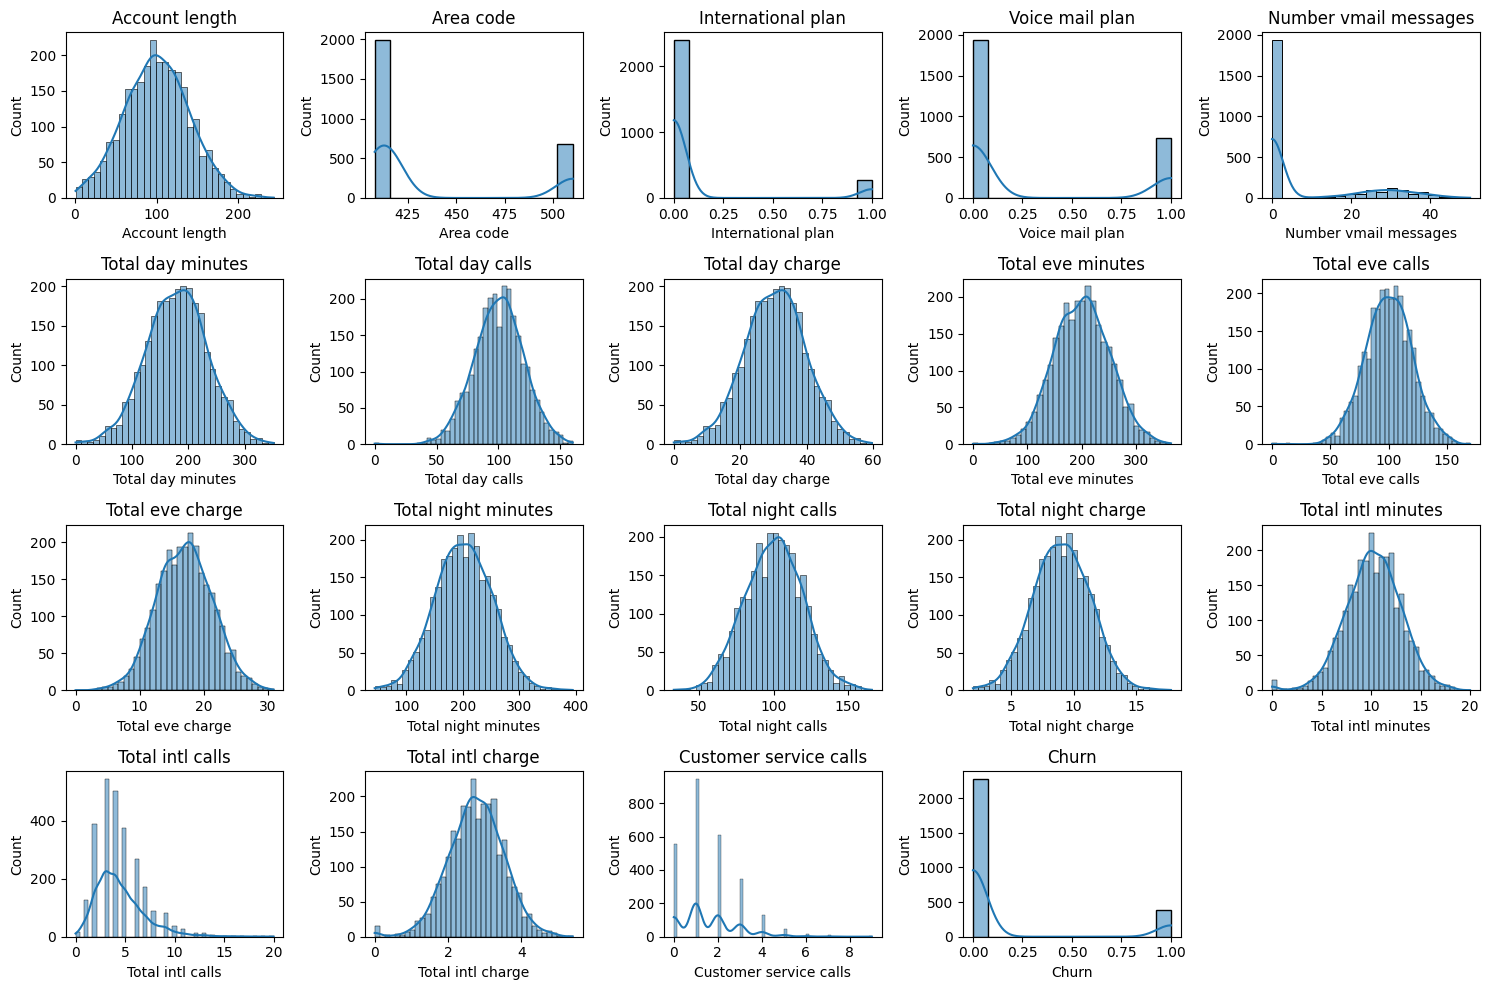

In [74]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(df80.select_dtypes(include=['int64', 'float64']).columns):
    plt.subplot(4, 5, i + 1)
    sns.histplot(df80[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

> Based on the chart above, we can make a preliminary assessment of the dataframe as follows:
* The dataframe has some categorical variables and some continuous variables.
* Most customer accounts are opened for more than 100 days.
* The customer seems to have no intention of using the service international.
* The number of customers who want to use voice mail service is 1/2 compared to the number of customers who do not intend to use the service.
* Many customers only call customer service once, or less than twice. 
* The number of customers who do not use this service ranks 3rd in the range from 0 to 9 times
* The number of customers leaving is nearly 1/6 of the total number of customers participating in the survey.

##### 3.3.2. Compare the average number of total day calls, total eve calls, total night calls and total intl calls

In [75]:
columns = ['Total day calls', 'Total eve calls', 'Total night calls', 'Total intl calls']

columns_compare = [df80[column].mean() for column in columns]

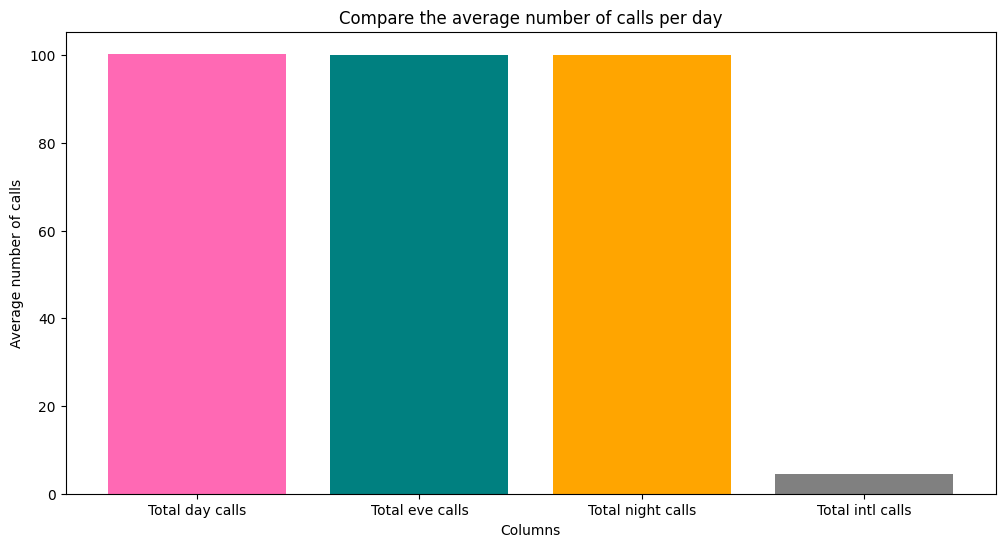

In [76]:
plt.figure(figsize=(12,6))

plt.bar(columns, columns_compare, color=['#ff69b4', '#008080', '#ffa500', '#808080'])
plt.title('Compare the average number of calls per day')
plt.xlabel('Columns')
plt.ylabel('Average number of calls')

plt.show()

> Most of the average values ​​in the columns are almost equal (for Total day calls, Total eve calls and Total night calls). The Total intl calls column alone has the least value.

##### 3.3.3. Compare the average number of Total day charge, Total eve charge, Total night charge and Total intl charge

In [77]:
columns = ['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']

columns_compare = [df80[column].mean() for column in columns]

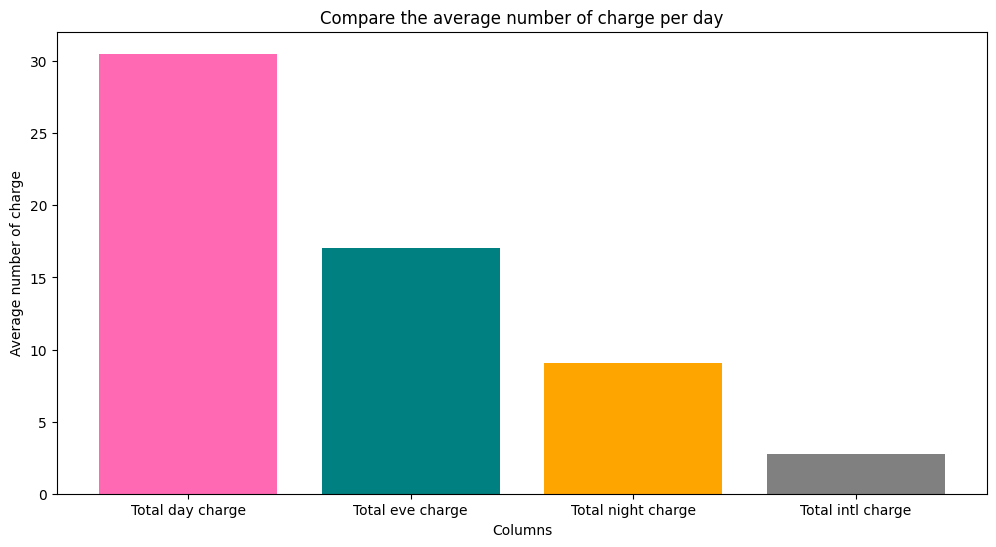

In [78]:
plt.figure(figsize=(12,6))

plt.bar(columns, columns_compare, color=['#ff69b4', '#008080', '#ffa500', '#808080'])
plt.title('Compare the average number of charge per day')
plt.xlabel('Columns')
plt.ylabel('Average number of charge')

plt.show()

> Total day charges account for the highest percentage, possibly due to the high Total day calls (analyzed above), so the number of times using the day service is this high.

##### 3.3.4. Correlation chart

In [79]:
numeric_columns = df80.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_columns.corr()

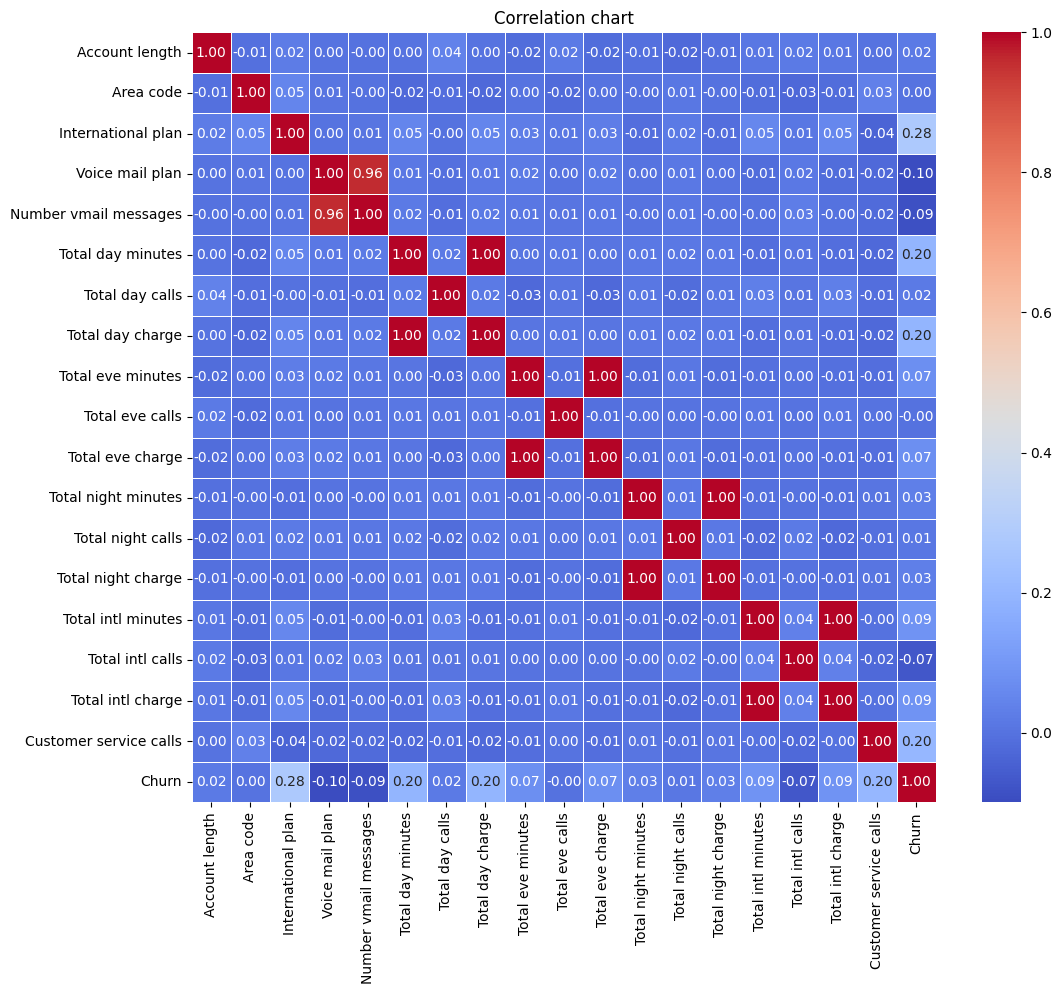

In [80]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation chart')
plt.show()

> Customers are most likely to leave if they use the internation service, which has long call lengths per day at high rates and a high number of calls to customer service.

> There is a high positive correlation between Voice mail plan and Number vmail messages, Total day minutes and Total day charge, Total eve minutes and Total eve charge, Total night minutes and Total night charge, Total intl minutes and Toal intl charge.

### 4. Build Prediction models

#### 4.1. Divide data into Train and Test

In [81]:
df80_filtered = df80.drop(['State', 'Number vmail messages', 'Total day charge', 
                            'Total eve charge', 'Total night charge', 'Total intl charge'], axis=1)

In [82]:
df20_filtered = df20.drop(['State', 'Number vmail messages', 'Total day charge', 
                           'Total eve charge', 'Total night charge', 'Total intl charge'], axis=1)

In [84]:
X_train = df80_filtered.drop('Churn', axis=1)
y_train = df80_filtered['Churn']

X_test = df20_filtered.drop('Churn', axis=1)
y_test = df20_filtered['Churn']

#### 4.2. Prepare necessary charts

In [109]:
def plot_roc_curve(model, y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    auc = roc_auc_score(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {type(model).__name__}')
    plt.legend(loc='lower right')
    plt.show()

In [105]:
def plot_confusion_matrix(model, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(12, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {type(model).__name__}')
    plt.show()

#### 4.3. Logistic Model

In [92]:
logreg_selected = LogisticRegression()
logreg_selected.fit(X_train, y_train)

y_train_pred_selected = logreg_selected.predict(X_train)

accuracy_train_selected = accuracy_score(y_train, y_train_pred_selected)

print("Accuracy in train:", accuracy_train_selected)

y_pred_selected_logreg = logreg_selected.predict(X_test)

accuracy_selected_logreg = accuracy_score(y_test, y_pred_selected_logreg)
print("Accuracy in test :", accuracy_selected_logreg)
print("Classification report:")
print(classification_report(y_test, y_pred_selected_logreg))

Accuracy in train: 0.8525881470367592
Accuracy in test : 0.8515742128935532
Classification report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       572
           1       0.38      0.06      0.11        95

    accuracy                           0.85       667
   macro avg       0.62      0.52      0.51       667
weighted avg       0.79      0.85      0.80       667



c:\Users\hghaa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


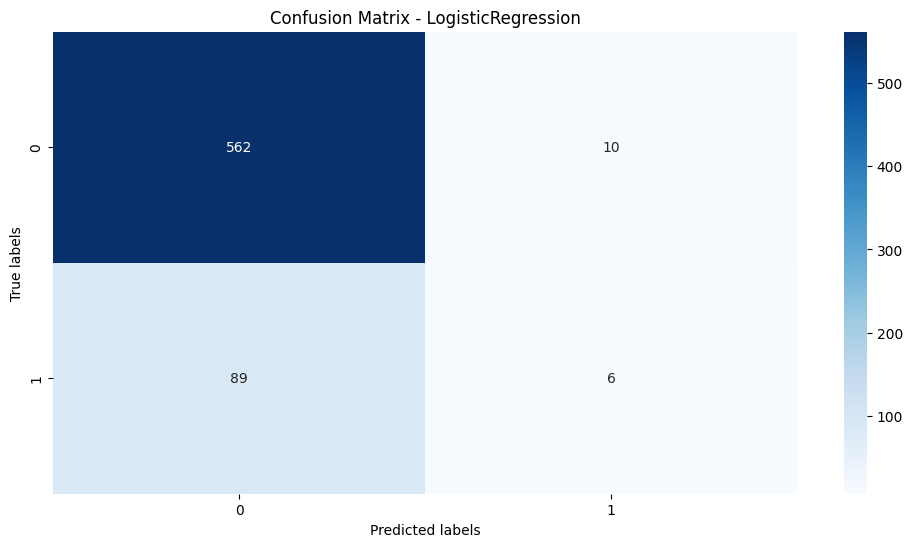

In [106]:
plot_confusion_matrix(logreg_selected, y_test, y_pred_selected_logreg)

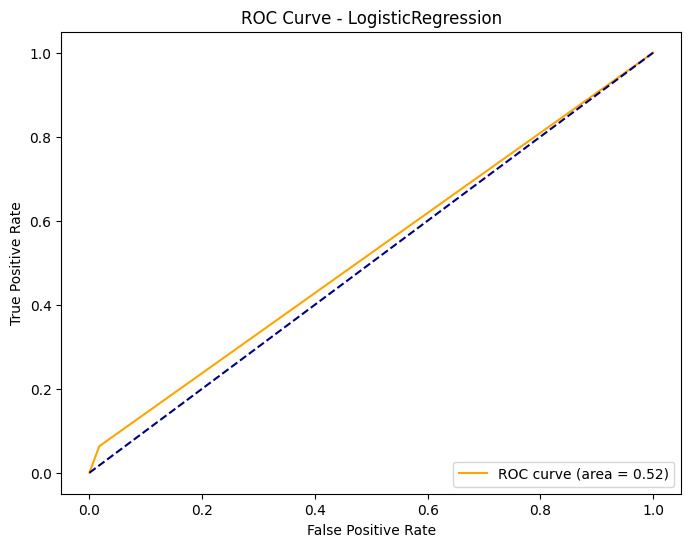

In [110]:
plot_roc_curve(logreg_selected, y_test, y_pred_selected_logreg)

In [97]:
accuracy = accuracy_score(y_train, y_train_pred_selected)
print(f'Accuracy: {accuracy:.4f}')

precision = precision_score(y_test, y_pred_selected_logreg, average='weighted')
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, y_pred_selected_logreg, average='weighted')
print(f"Recall: {recall:.4f}")

f1score = f1_score(y_test, y_pred_selected_logreg, average='weighted')
print(f"F1-score: {f1score}")

Accuracy: 0.8526
Precision: 0.7937
Recall: 0.8516
F1-score: 0.8035498283653029


#### 4.4. Random Forest Model

In [111]:
rf_selected = RandomForestClassifier(random_state=42)
rf_selected.fit(X_train, y_train)

y_train_pred_selected = rf_selected.predict(X_train)

accuracy_train_selected = accuracy_score(y_train, y_train_pred_selected)

print("Accuracy in train:", accuracy_train_selected)

y_pred_selected_rf = rf_selected.predict(X_test)

accuracy_selected_rf = accuracy_score(y_test, y_pred_selected_rf)
print("Accuracy in test:", accuracy_selected_rf)
print("Classification report")
print(classification_report(y_test, y_pred_selected_rf))

Accuracy in train: 0.9996249062265566
Accuracy in test: 0.9445277361319341
Classification report
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       572
           1       0.95      0.64      0.77        95

    accuracy                           0.94       667
   macro avg       0.95      0.82      0.87       667
weighted avg       0.94      0.94      0.94       667



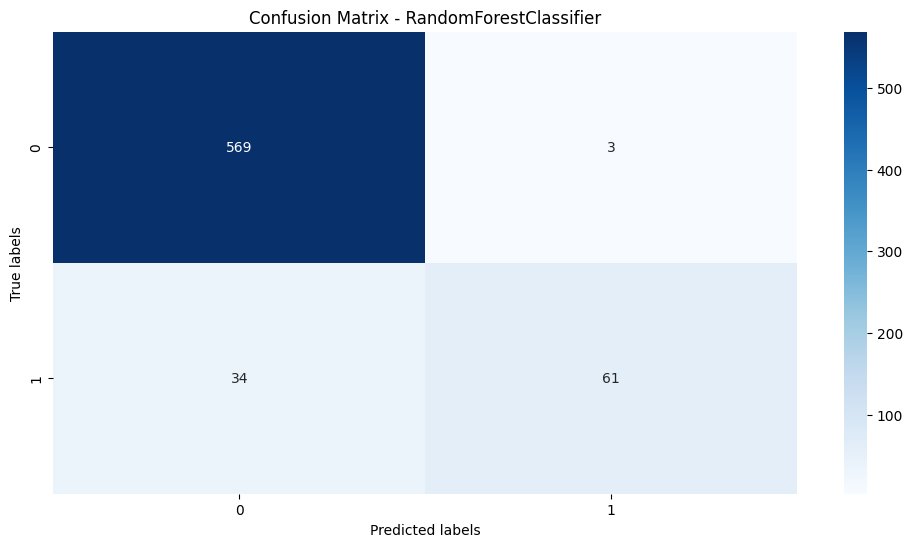

In [112]:
plot_confusion_matrix(rf_selected, y_test, y_pred_selected_rf)

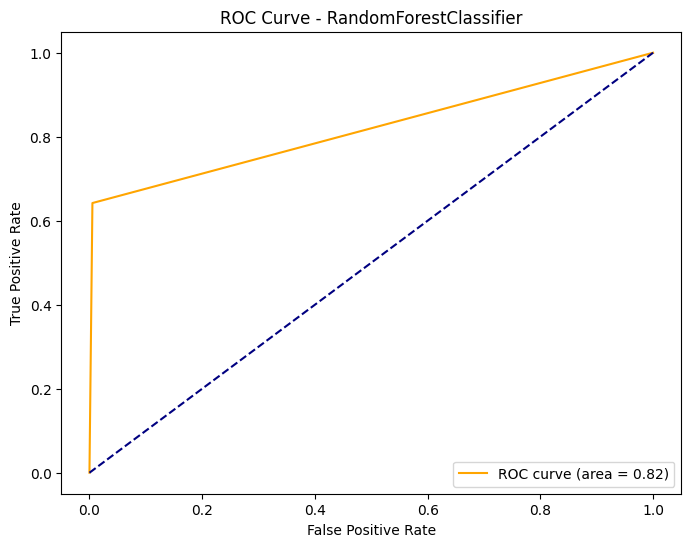

In [113]:
plot_roc_curve(rf_selected, y_test, y_pred_selected_rf)

In [114]:
accuracy = accuracy_score(y_train, y_train_pred_selected)
print(f'Accuracy: {accuracy:.4f}')

precision = precision_score(y_test, y_pred_selected_rf, average='weighted')
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, y_pred_selected_rf, average='weighted')
print(f"Recall: {recall:.4f}")

f1score = f1_score(y_test, y_pred_selected_rf, average='weighted')
print(f"F1-score: {f1score}")

Accuracy: 0.9996
Precision: 0.9450
Recall: 0.9445
F1-score: 0.9398518243888895


#### 4.5. FNN Model (Deep Learning)

In [118]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [119]:
custom_optimizer = Adam(learning_rate=0.001)

In [121]:
model = Sequential()
model.add(Dense(units=128, activation='relu', input_shape=(X_train_scaled.shape[1],),name='layer_1'))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu',name='layer_2'))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu',name='layer_3'))
model.add(Dropout(0.2))
model.add(Dense(units=16, activation='relu',name='layer_4'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid',name='layer_5'))

In [125]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [126]:
early_stopping_callback = EarlyStopping(
    monitor='loss', 
    patience=15,          
    restore_best_weights=True  
)

In [127]:
model.fit(
    X_train_scaled,
    y_train,
    verbose=1,
    epochs=200,
    callbacks=[early_stopping_callback] 
)

Epoch 1/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8558 - loss: 13.2369
Epoch 2/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8488 - loss: 1.6905
Epoch 3/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8328 - loss: 0.4405
Epoch 4/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8507 - loss: 0.4015
Epoch 5/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8537 - loss: 0.3713
Epoch 6/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8588 - loss: 0.3676
Epoch 7/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8621 - loss: 0.3508
Epoch 8/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8520 - loss: 0.3418
Epoch 9/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8662 - loss: 0.3262
Epoch 10/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8615 - loss: 0.3326
Epoch 11/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8796 - loss: 0.3246
Epoch 12/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy

In [128]:
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [129]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       572
           1       0.82      0.74      0.78        95

    accuracy                           0.94       667
   macro avg       0.89      0.86      0.87       667
weighted avg       0.94      0.94      0.94       667



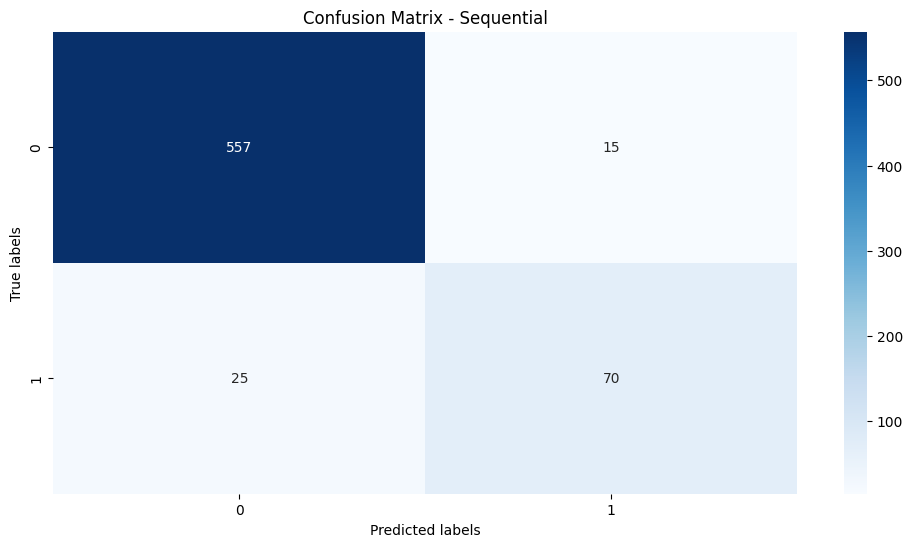

In [133]:
plot_confusion_matrix(model, y_test, y_pred)

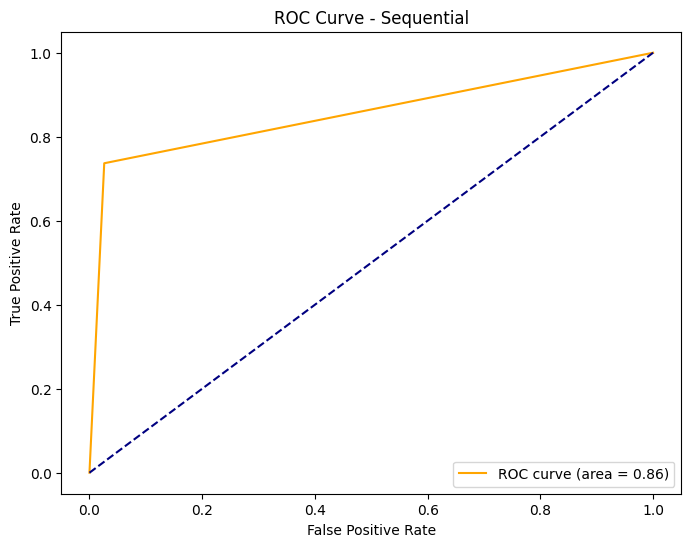

In [134]:
plot_roc_curve(model, y_test, y_pred)

In [139]:
model.save('fnn_model.keras')